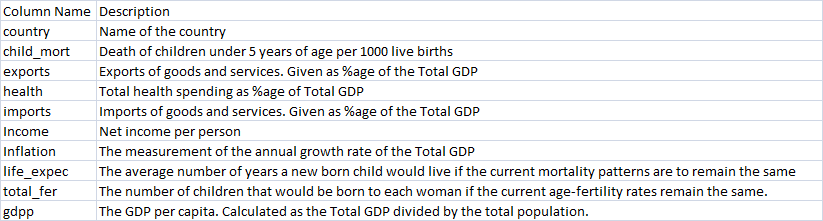

In [138]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA

from sklearn.cluster import KMeans, hierarchical
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.metrics import silhouette_score

In [2]:
# Reading the dataset
data = pd.read_csv("Country-data.csv")

In [3]:
# First five rows of the data
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Bottom five rows of the dataset
data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [7]:
data.shape

(167, 10)

In [12]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
# Data stats
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# EDA

In [8]:
# count of countries
len(data['country'].unique())

167

- Unique countries. No country is repeated

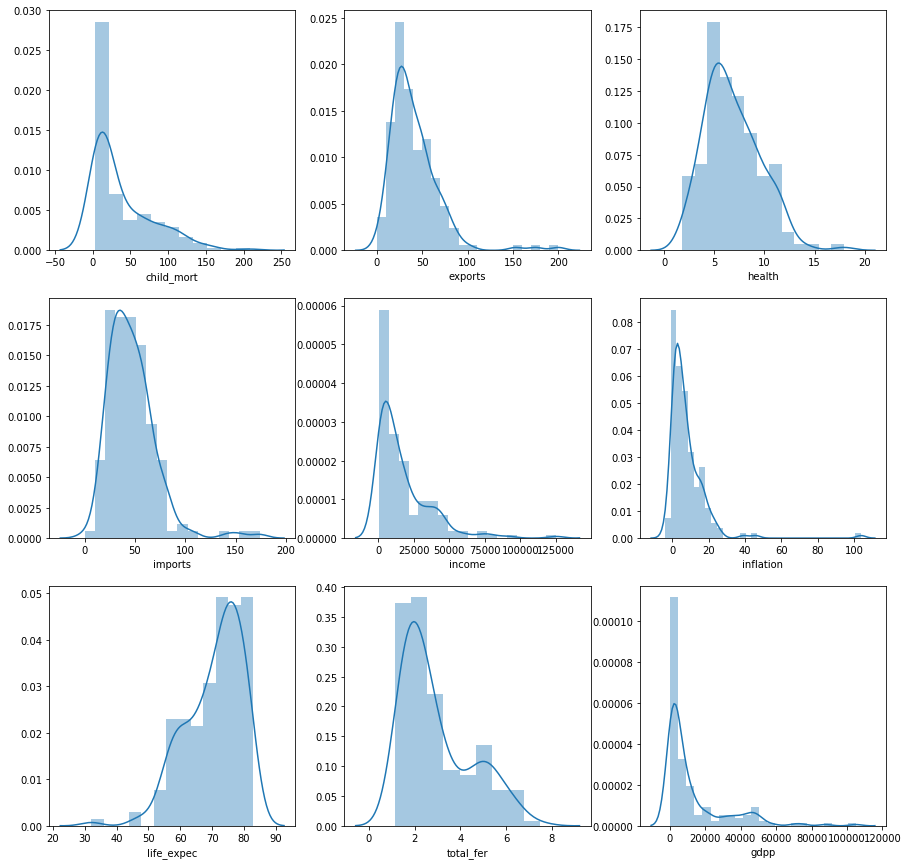

In [21]:
# Check distplot of all the numerical columns

# List of columns in the dataframe
cols = list(data.columns)

# Dropping country column as it is not numeric
cols.pop(0)

plt.figure(figsize = (15,15))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[cols[i]])
plt.show()

1. Child_mort is right skewed. **More** number of countries have high child death rate. **Outliers are present**
- Exports' data is quite normal but have **few** outliers.
- Health has not much outliers very **few** in number.
- Imports have a **few outliers**.
- Income is skewed. **Many outliers**.
- Inflation has **few** outliers.
- life expectancy is left skewed and have outliers.
- Total fertility rate is a little skewed and has a peak at 5.
- gdpp is extremely right skewed.

In [48]:
# Let's see outliers in each column

for i in cols:
    iqr = data[i].quantile(0.75) - data[i].quantile(0.25)
    ul = data[i].quantile(0.75) + 1.5*iqr
    ll = data[i].quantile(0.25) - 1.5*iqr
    
    # number of outliers
    n = (len(data) - data[(data[i] > ll) & (data[i] < ul)].count()[0])/len(data)*100
    
    print("Percentage of outliers in the column {0} are {1}".format(i,n))

Percentage of outliers in the column child_mort are 2.3952095808383236
Percentage of outliers in the column exports are 2.9940119760479043
Percentage of outliers in the column health are 1.1976047904191618
Percentage of outliers in the column imports are 2.3952095808383236
Percentage of outliers in the column income are 4.790419161676647
Percentage of outliers in the column inflation are 2.9940119760479043
Percentage of outliers in the column life_expec are 1.7964071856287425
Percentage of outliers in the column total_fer are 0.5988023952095809
Percentage of outliers in the column gdpp are 14.97005988023952


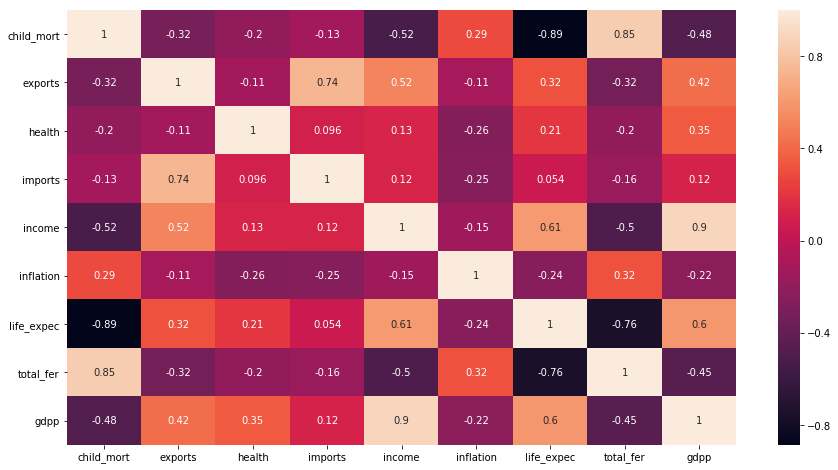

In [77]:
# Correlation plot
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

- Let's remove outliers present in gdpp, income, inflation, exports, lif_expec as we don't want the countries which have high economy and life_expectancy as that won't be neccessary because these countries can handle there problems.
- But we don't want to remove the outliers from child_mort as these are the ones which we are targeting.

In [264]:
# Removing outliers from gdpp
iqr = data['gdpp'].quantile(0.75)-data['gdpp'].quantile(0.25) # Inter Quartile Range
ul = data['gdpp'].quantile(0.75) + 1.5*iqr # Upper Limit
ll = data['gdpp'].quantile(0.25) - 1.5*iqr

out_df = data[(data['gdpp']<ul) & (data['gdpp']>ll)]

In [265]:
# Removing outliers from income
iqr = out_df['income'].quantile(0.75)-out_df['income'].quantile(0.25) # Inter Quartile Range
ul = out_df['income'].quantile(0.75) + 1.5*iqr # Upper Limit
ll = out_df['income'].quantile(0.25) - 1.5*iqr

out_df = out_df[(out_df['income']<ul) & (out_df['income']>ll)]

In [266]:
# Removing outliers from inflation
iqr = out_df['inflation'].quantile(0.75)-out_df['inflation'].quantile(0.25) # Inter Quartile Range
ul = out_df['inflation'].quantile(0.75) + 1.5*iqr # Upper Limit
ll = out_df['inflation'].quantile(0.25) - 1.5*iqr

out_df = out_df[(out_df['inflation']<ul) & (out_df['inflation']>ll)]

In [267]:
# Removing outliers from exports
iqr = out_df['exports'].quantile(0.75)-out_df['exports'].quantile(0.25) # Inter Quartile Range
ul = out_df['exports'].quantile(0.75) + 1.5*iqr # Upper Limit
ll = out_df['exports'].quantile(0.25) - 1.5*iqr

out_df = out_df[(out_df['exports']<ul) & (out_df['exports']>ll)]

In [268]:
# Removing outliers from life_expec
iqr = out_df['life_expec'].quantile(0.75)-out_df['life_expec'].quantile(0.25) # Inter Quartile Range
ul = out_df['life_expec'].quantile(0.75) + 1.5*iqr # Upper Limit
ll = out_df['life_expec'].quantile(0.25) - 1.5*iqr

out_df = out_df[(out_df['life_expec']<ul) & (out_df['life_expec']>ll)]

In [269]:
len(out_df)

131

In [270]:
131/167

0.7844311377245509

- We are still remaining with about 80% of data

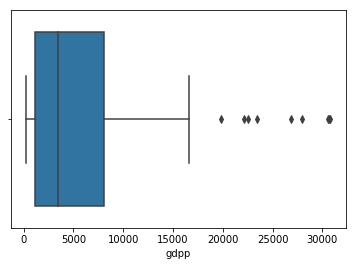

In [271]:
sns.boxplot(out_df['gdpp'])

In [272]:
# Let's see outliers in each column

for i in cols:
    iqr = out_df[i].quantile(0.75) - out_df[i].quantile(0.25)
    ul = out_df[i].quantile(0.75) + 1.5*iqr
    ll = out_df[i].quantile(0.25) - 1.5*iqr
    
    # number of outliers
    n = (len(out_df) - out_df[(out_df[i] > ll) & (out_df[i] < ul)].count()[0])/len(out_df)*100
    
    print("Percentage of outliers in the column {0} are {1}".format(i,n))

Percentage of outliers in the column child_mort are 2.2900763358778624
Percentage of outliers in the column exports are 0.0
Percentage of outliers in the column health are 1.5267175572519083
Percentage of outliers in the column imports are 0.7633587786259541
Percentage of outliers in the column income are 0.0
Percentage of outliers in the column inflation are 1.5267175572519083
Percentage of outliers in the column life_expec are 0.0
Percentage of outliers in the column total_fer are 0.0
Percentage of outliers in the column gdpp are 6.870229007633588


After removing outliers many of the variables have been treated. Rest of the outliers we should not remove as we will loose information. Like we should not remove the values which have high child_mort because this value is important with respect to the countries which we want to select.

## Feature Standardisation

In [273]:
# copying the data
df = out_df.copy()

# removing the country column from this copied data
df.drop(columns = 'country', inplace = True)

In [274]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [275]:
# Standardising the df
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [276]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,1.229593,-1.431683,0.452163,-0.043308,-0.994819,0.380056,-1.590082,1.740546,-0.780722,0.596524
1,-0.693648,-0.452136,0.018789,0.156866,-0.004654,-0.437904,0.930292,-0.956552,-0.261666,0.596524
2,-0.414047,0.113824,-0.982599,-0.773671,0.348806,1.480585,0.955370,-0.154537,-0.207368,-1.459913
3,1.982165,1.414444,-1.537991,-0.151510,-0.484265,2.521625,-1.101054,1.960453,-0.343846,0.596524
4,-0.858273,0.500201,-0.200001,0.714105,1.086669,-0.941900,0.992987,-0.646095,0.928480,-1.459913


## PCA

In [277]:
# Initiating the pca
pca = PCA(random_state=42)

# Fitting the PCA
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [278]:
# Components of pca
pca.components_

array([[-0.42420068,  0.22512685,  0.10529566,  0.09523036,  0.423737  ,
        -0.18687777,  0.40992602, -0.417111  ,  0.37956752, -0.22056044],
       [ 0.0767685 ,  0.33295303,  0.35563125,  0.72648269, -0.1340391 ,
        -0.38017437, -0.16436808,  0.08475924, -0.06132769,  0.16892922],
       [-0.035669  ,  0.6002087 , -0.51676413,  0.22173813, -0.04725715,
         0.3774236 , -0.03512825, -0.02483425, -0.25309276, -0.33417927],
       [ 0.0108133 ,  0.13710997, -0.61447434, -0.02025657,  0.05958377,
        -0.28543031,  0.11216363,  0.03265922,  0.20852767,  0.6789279 ],
       [ 0.3511231 ,  0.31753797,  0.17493781, -0.11536561,  0.43053373,
         0.26225607, -0.27337812,  0.35147348,  0.52820744,  0.02366207],
       [-0.22922752,  0.00487145,  0.27312831,  0.1781989 , -0.06403751,
         0.69955686,  0.20350928, -0.13801967, -0.02403638,  0.53530672],
       [-0.03615764, -0.06612433, -0.06687121, -0.00458194,  0.08494287,
         0.03450276, -0.72927881, -0.66127656

In [279]:
# Explained Variance Ratio
pca.explained_variance_ratio_

array([0.4461724 , 0.15240004, 0.12530314, 0.08808982, 0.07492691,
       0.06459754, 0.01883161, 0.01734456, 0.00940789, 0.00292608])

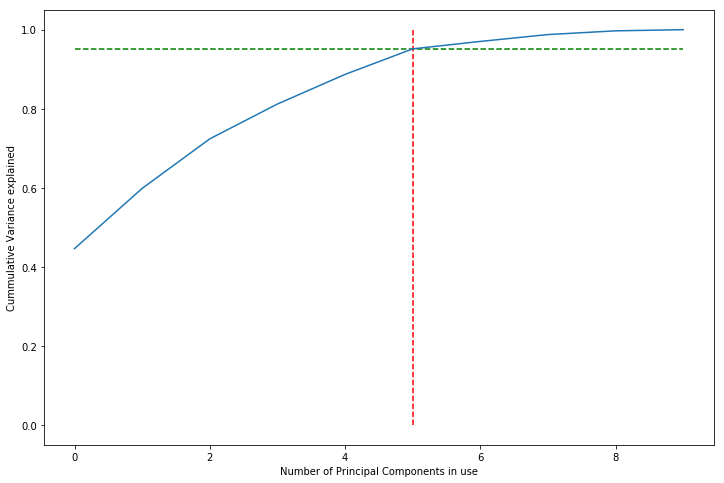

In [281]:
# Scree plot for explained variance ratio
var_cummu = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (12,8))
plt.plot(var_cummu)
plt.vlines(x = 5, ymax = 1, ymin = 0, color = 'r', linestyles = '--')
plt.hlines(y = 0.95, xmax = 9, xmin = 0, color = 'g', linestyles = "--")
plt.xlabel("Number of Principal Components in use")
plt.ylabel("Cummulative Variance explained")
plt.show()

In [282]:
# PCA with 5 compnents only
pca_final = IncrementalPCA(n_components = 5)

# Fitting and transforming the data
pca_df = pd.DataFrame(pca_final.fit_transform(df), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [283]:
pca_df.shape

(131, 5)

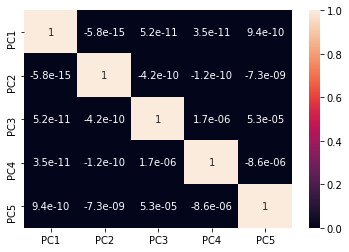

In [284]:
# Correlation
sns.heatmap(pca_df.corr(), annot = True)

In [285]:
# Checking for outliers
pca_df.describe(percentiles = [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.99])

,PC1,PC2,PC3,PC4,PC5
count,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02
mean,9.094947e-13,-6.439361e-13,9.058064e-15,1.878480e-15,-2.806915e-15
std,1.065709e+04,2.089642e+03,2.810310e+01,2.161585e+01,1.045300e+01
min,-1.077211e+04,-7.366106e+03,-5.460697e+01,-5.154490e+01,-3.629865e+01
10%,-1.002863e+04,-2.146578e+03,-3.454452e+01,-2.810404e+01,-9.693991e+00
20%,-9.174870e+03,-1.404022e+03,-2.362833e+01,-1.878818e+01,-7.329581e+00
25%,-8.659299e+03,-1.103679e+03,-1.930293e+01,-1.442940e+01,-5.927032e+00
30%,-7.898667e+03,-7.435768e+02,-1.681484e+01,-1.249382e+01,-4.980123e+00
40%,-5.349322e+03,-2.332786e+02,-9.777318e+00,-7.178284e+00,-2.090214e+00
50%,-3.433665e+03,5.720077e+01,-1.567643e+00,-2.047888e+00,-5.312331e-02


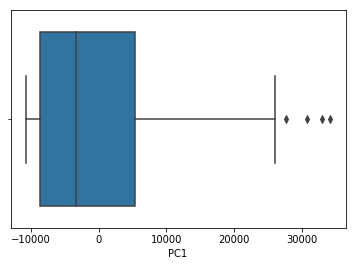

In [286]:
sns.boxplot(pca_df['PC1'])

- Very less number of outliers in all the columns let's drop the outliers from PC1 and they have some information so not removing them.

In [113]:
# iqr = pca_df['PC1'].quantile(0.75) - pca_df['PC1'].quantile(0.25)
# ul = pca_df['PC1'].quantile(0.75) + 1.5*iqr
# ll = pca_df['PC1'].quantile(0.25) - 1.5*iqr

# out_df1 = pca_df[(pca_df['PC1']>ll) & (pca_df['PC1']<ul)]

In [114]:
out_df1.shape[0]/len(df)

0.8922155688622755

## Clustering

In [287]:
final_df = pca_df.copy()

In [288]:
# KMeans Clustering
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(final_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

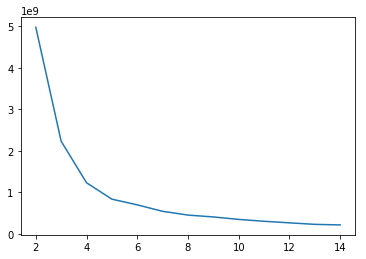

In [290]:
# Elbow plot
error = []

for i in range(2,15):
    kmeans = KMeans(n_clusters = i)
    error.append(kmeans.fit(final_df).inertia_)


plt.plot(range(2,15),error)

- From this curve we can see that number of clusters can be 5

In [291]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(final_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(final_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.633530198456192
For n_clusters=3, the silhouette score is 0.6139396741571502
For n_clusters=4, the silhouette score is 0.5768683518795974
For n_clusters=5, the silhouette score is 0.5668292691274476
For n_clusters=6, the silhouette score is 0.5533011755736411
For n_clusters=7, the silhouette score is 0.5268183965754727
For n_clusters=8, the silhouette score is 0.5213014669518573
For n_clusters=9, the silhouette score is 0.47076944897411105
For n_clusters=10, the silhouette score is 0.47174202614459376


In [292]:
# Let's build for clusters 5 and checking the boxplot
group_df = final_df.copy()

In [378]:
group_df['Label'] = KMeans(n_clusters = 5).fit(final_df).labels_
group_df.head()

,PC1,PC2,PC3,PC4,PC5,Label,hierarchy_labels
0,-9852.798135,1050.025766,20.682471,-5.793983,-14.476076,3,0
1,-1141.879583,-1370.077118,-21.898752,-12.064487,-8.245636,0,1
2,1411.227415,-2931.829532,6.466167,-14.249620,5.193055,4,1
3,-4642.573925,704.181875,56.515270,35.504634,20.982497,0,1
4,11083.843609,-743.576826,-7.204664,8.712404,-8.479230,1,2


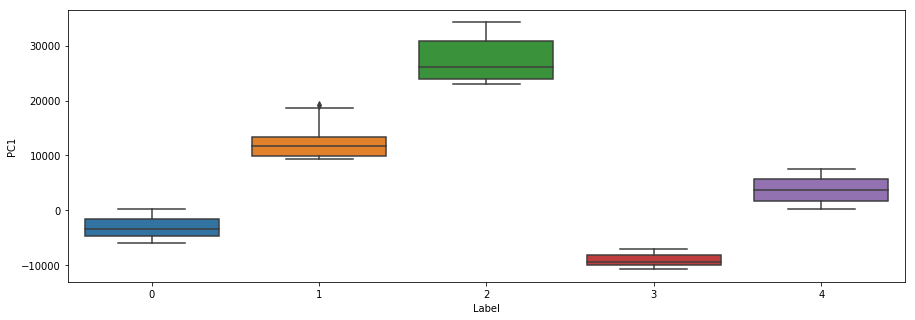

In [379]:
# Boxplot
plt.figure(figsize = (15,5))
sns.boxplot('Label', 'PC1', data = group_df)

- Clusters build are good as they are ables to distinguish clearly

### Hierarchical clustering

In [297]:
final_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-9852.798135,1050.025766,20.682471,-5.793983,-14.476076
1,-1141.879583,-1370.077118,-21.898752,-12.064487,-8.245636
2,1411.227415,-2931.829532,6.466167,-14.249620,5.193055
3,-4642.573925,704.181875,56.515270,35.504634,20.982497
4,11083.843609,-743.576826,-7.204664,8.712404,-8.479230


In [298]:
group_df.head()

,PC1,PC2,PC3,PC4,PC5,Label
0,-9852.798135,1050.025766,20.682471,-5.793983,-14.476076,4
1,-1141.879583,-1370.077118,-21.898752,-12.064487,-8.245636,0
2,1411.227415,-2931.829532,6.466167,-14.249620,5.193055,3
3,-4642.573925,704.181875,56.515270,35.504634,20.982497,0
4,11083.843609,-743.576826,-7.204664,8.712404,-8.479230,1


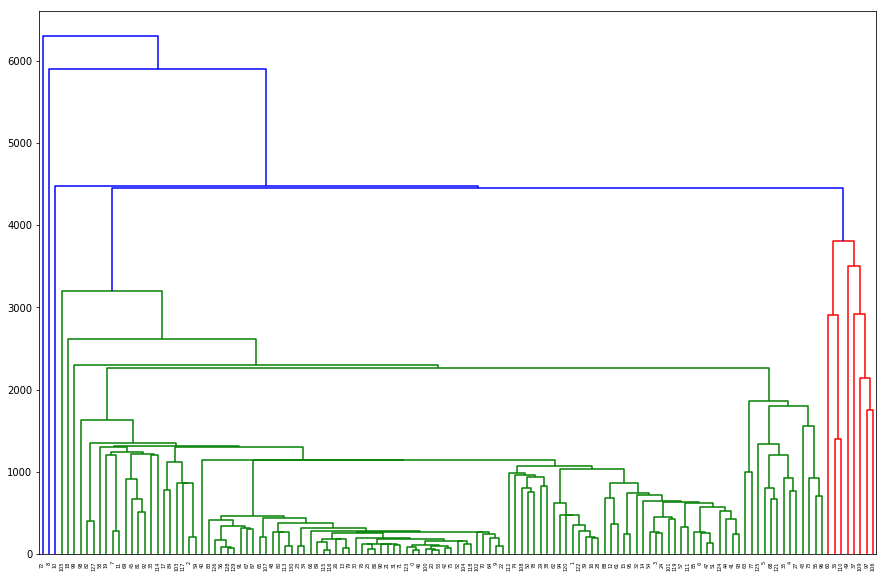

In [299]:
# single linkage
plt.figure(figsize = (15,10))
mergings = linkage(final_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

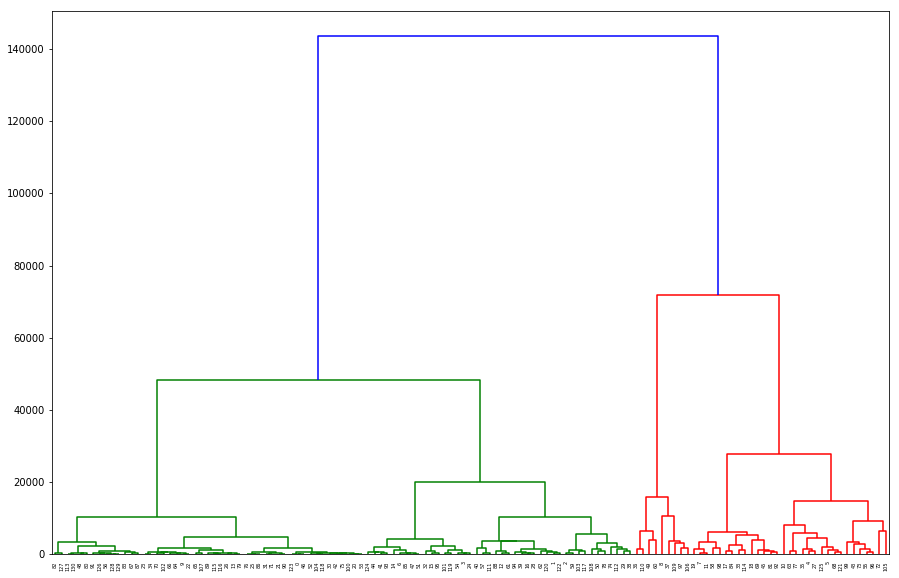

In [316]:
# complete linkage
plt.figure(figsize = (15,10))
mergings = linkage(final_df, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

- From the dendrogram 5 clusters are visible clearly

In [380]:
hierar_clusters = cut_tree(mergings, n_clusters = 5).reshape(-1,)

In [381]:
group_df['hierarchy_labels'] = hierar_clusters
group_df.head()

,PC1,PC2,PC3,PC4,PC5,Label,hierarchy_labels
0,-9852.798135,1050.025766,20.682471,-5.793983,-14.476076,3,0
1,-1141.879583,-1370.077118,-21.898752,-12.064487,-8.245636,0,1
2,1411.227415,-2931.829532,6.466167,-14.249620,5.193055,4,1
3,-4642.573925,704.181875,56.515270,35.504634,20.982497,0,1
4,11083.843609,-743.576826,-7.204664,8.712404,-8.479230,1,2


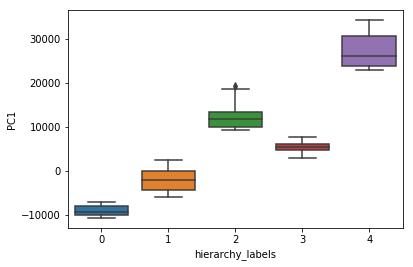

In [382]:
sns.boxplot('hierarchy_labels', 'PC1', data = group_df)

- Here also it is showing quite good clusters without overlapping

### Final model considered will be of 5 clusters

In [405]:
group_df['Label'] = KMeans(n_clusters = 4).fit(final_df).labels_
group_df.head()

,PC1,PC2,PC3,PC4,PC5,Label,hierarchy_labels
0,-9852.798135,1050.025766,20.682471,-5.793983,-14.476076,0,0
1,-1141.879583,-1370.077118,-21.898752,-12.064487,-8.245636,3,1
2,1411.227415,-2931.829532,6.466167,-14.249620,5.193055,3,1
3,-4642.573925,704.181875,56.515270,35.504634,20.982497,0,1
4,11083.843609,-743.576826,-7.204664,8.712404,-8.479230,1,2


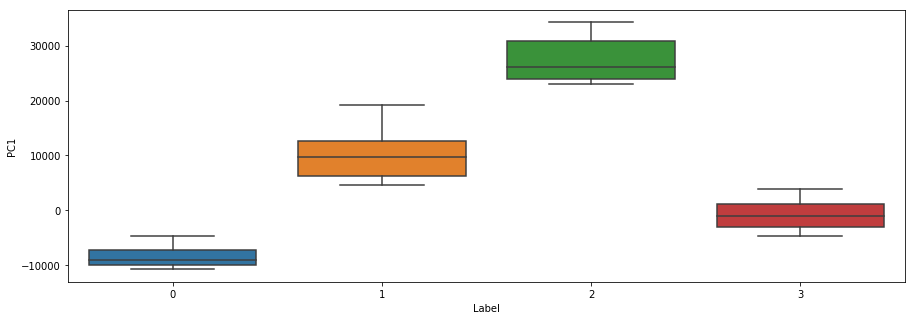

In [406]:
# Boxplot
plt.figure(figsize = (15,5))
sns.boxplot('Label', 'PC1', data = group_df)

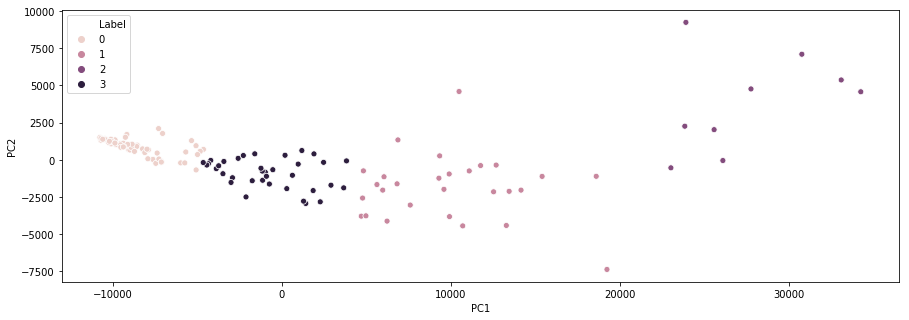

In [407]:
plt.figure(figsize = (15,5))
sns.scatterplot('PC1', 'PC2', hue = 'Label', data = group_df)

In [408]:
# Final model using KMeans with 5 clusters analysing it
out_df['label'] = group_df['Label']

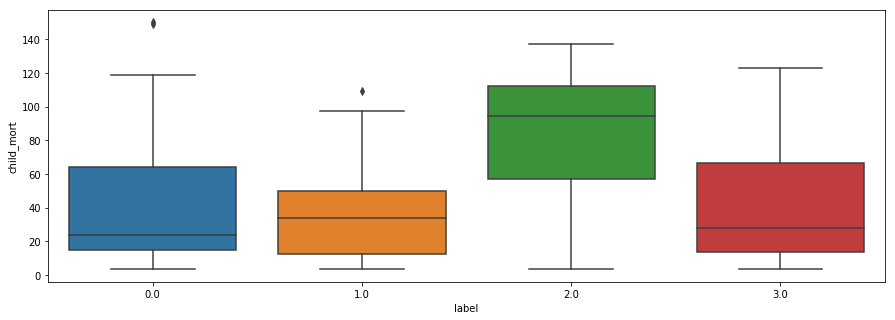

In [409]:
# Child mortality_rate
plt.figure(figsize = (15,5))
sns.boxplot(out_df['label'],out_df['child_mort'])

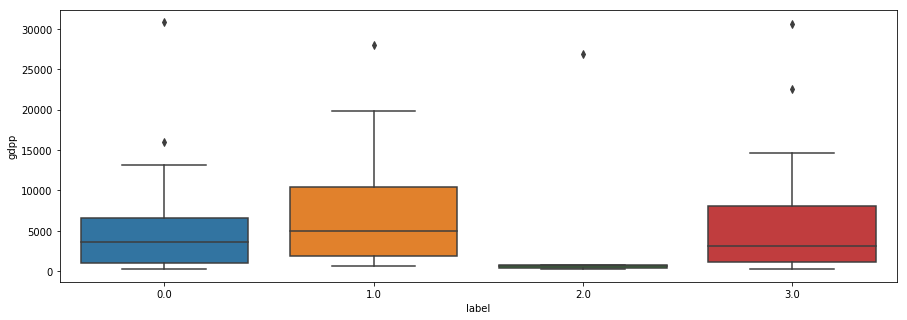

In [410]:
# gdp
plt.figure(figsize = (15,5))
sns.boxplot(out_df['label'],out_df['gdpp'])

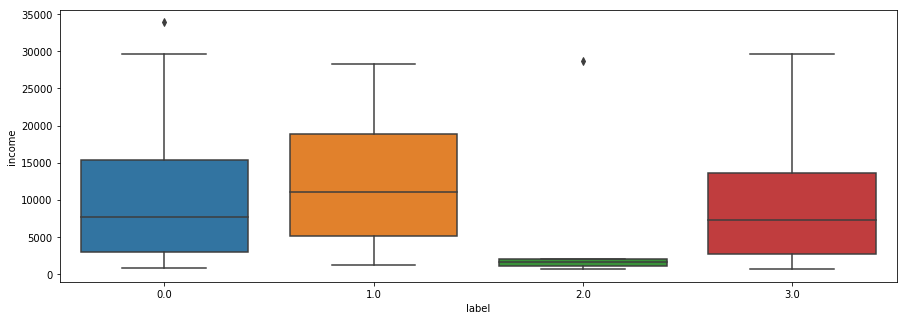

In [411]:
# income
plt.figure(figsize = (15,5))
sns.boxplot(out_df['label'],out_df['income'])

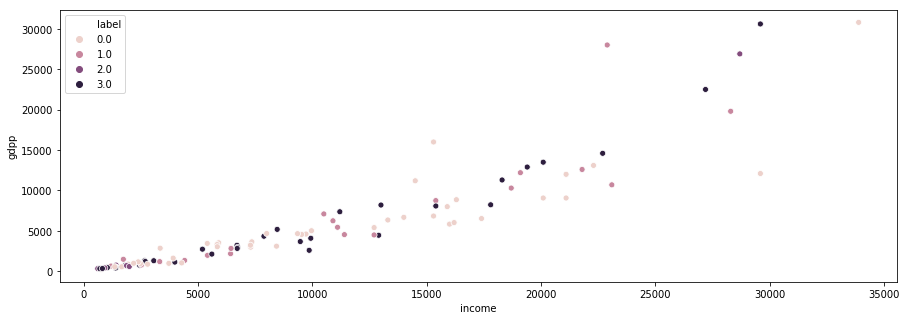

In [412]:
# Scatterplot of income and gdpp
plt.figure(figsize = (15,5))
sns.scatterplot(out_df['income'], out_df['gdpp'], hue = out_df['label'])

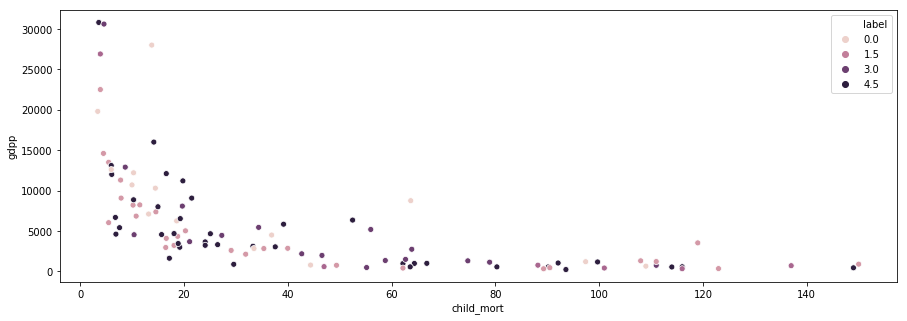

In [395]:
# Scatterplot of child_mort and gdpp
plt.figure(figsize = (15,5))
sns.scatterplot(out_df['child_mort'], out_df['gdpp'], hue = out_df['label'])

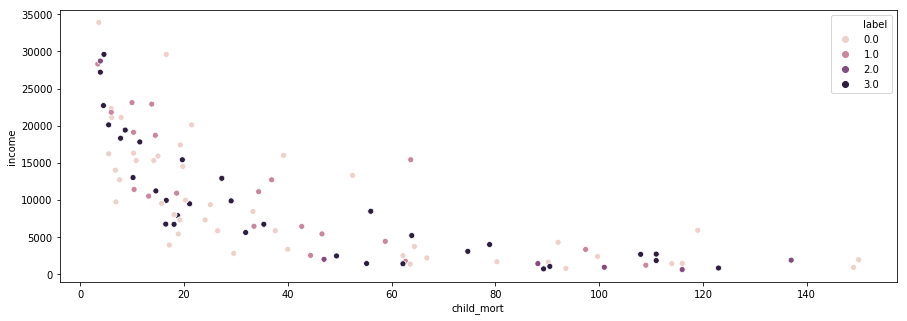

In [413]:
# Scatterplot of income and child_mort
plt.figure(figsize = (15,5))
sns.scatterplot(out_df['child_mort'], out_df['income'], hue = out_df['label'])

# From the above clusters we can clearly see that the label 2 is assigned to the countries which have ***very low income***, ***very low per capita GDP*** and ***high child deaths***.

In [414]:
list(out_df[out_df['label']==2]['country'])

['Comoros', 'Congo, Dem. Rep.', 'Greece', 'Mali', 'Mozambique', 'Nepal']

### Final model considered will be of 5 clusters

In [416]:
group_df['Label'] = KMeans(n_clusters = 5).fit(final_df).labels_
group_df.head()

,PC1,PC2,PC3,PC4,PC5,Label,hierarchy_labels
0,-9852.798135,1050.025766,20.682471,-5.793983,-14.476076,2,0
1,-1141.879583,-1370.077118,-21.898752,-12.064487,-8.245636,0,1
2,1411.227415,-2931.829532,6.466167,-14.249620,5.193055,3,1
3,-4642.573925,704.181875,56.515270,35.504634,20.982497,0,1
4,11083.843609,-743.576826,-7.204664,8.712404,-8.479230,1,2


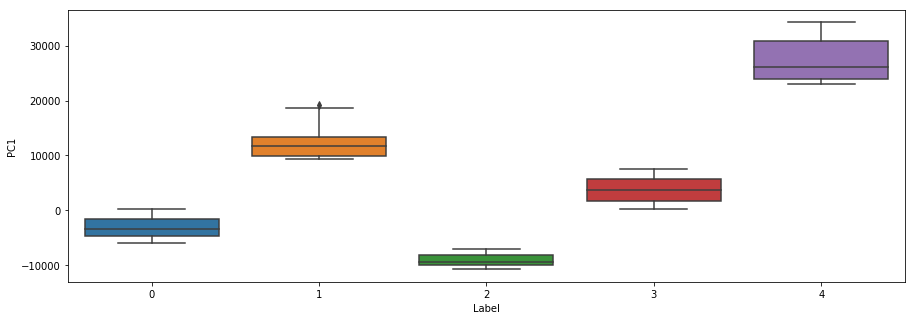

In [417]:
# Boxplot
plt.figure(figsize = (15,5))
sns.boxplot('Label', 'PC1', data = group_df)

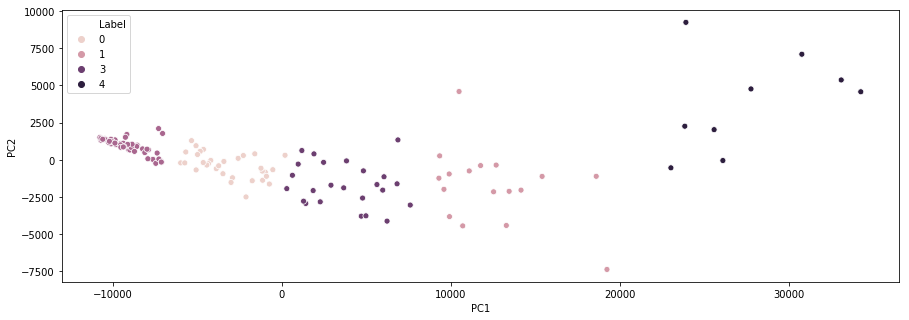

In [418]:
plt.figure(figsize = (15,5))
sns.scatterplot('PC1', 'PC2', hue = 'Label', data = group_df)

In [419]:
# Final model using KMeans with 5 clusters analysing it
out_df['label'] = group_df['Label']

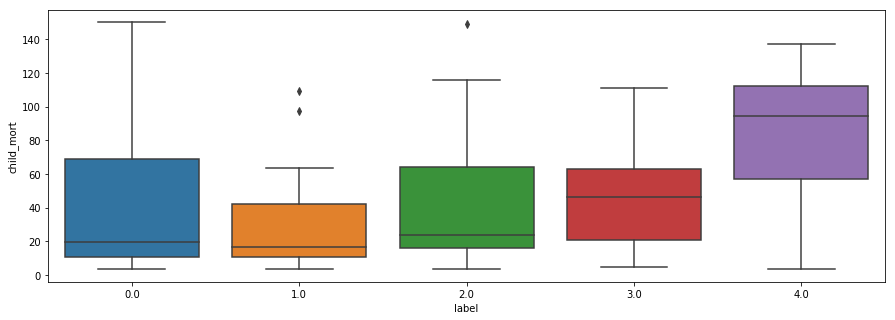

In [420]:
# Child mortality_rate
plt.figure(figsize = (15,5))
sns.boxplot(out_df['label'],out_df['child_mort'])

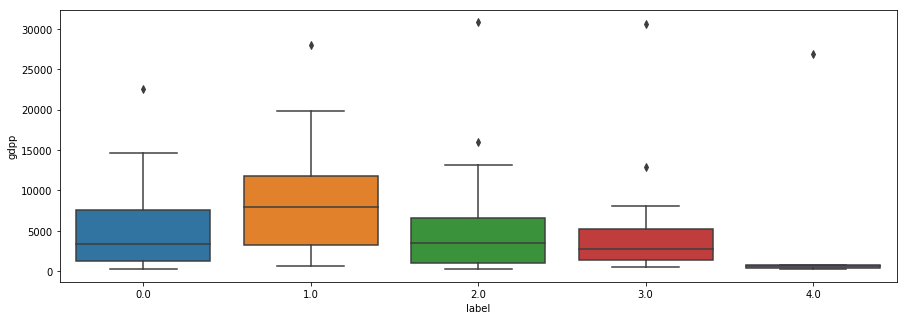

In [421]:
# gdp
plt.figure(figsize = (15,5))
sns.boxplot(out_df['label'],out_df['gdpp'])

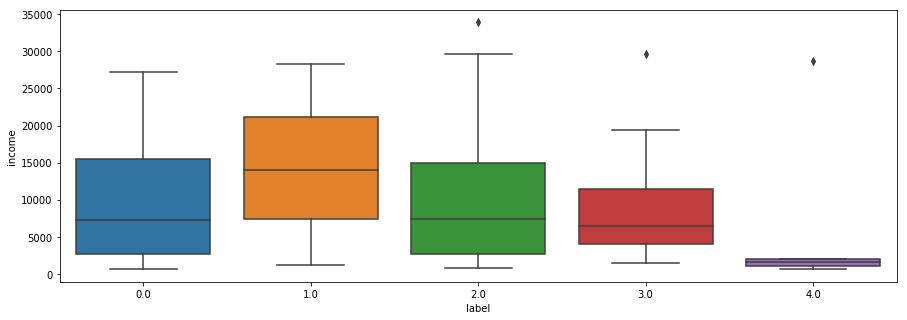

In [422]:
# income
plt.figure(figsize = (15,5))
sns.boxplot(out_df['label'],out_df['income'])

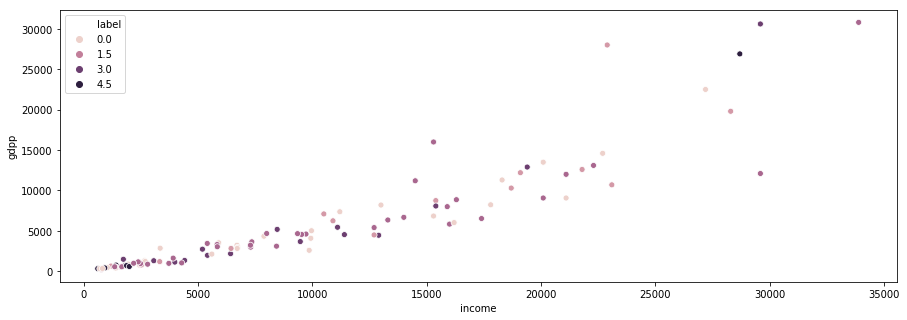

In [423]:
# Scatterplot of income and gdpp
plt.figure(figsize = (15,5))
sns.scatterplot(out_df['income'], out_df['gdpp'], hue = out_df['label'])

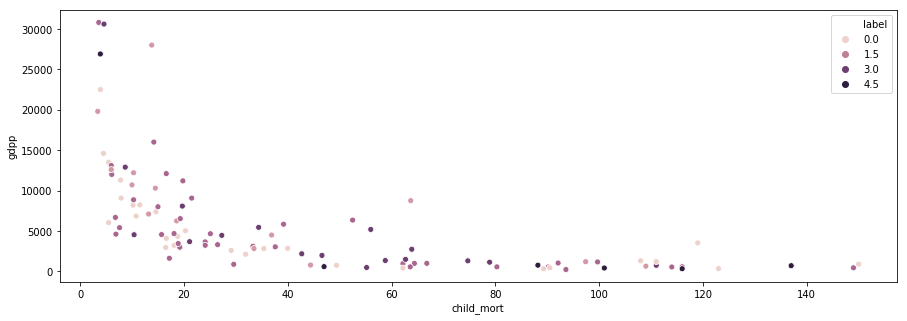

In [424]:
# Scatterplot of child_mort and gdpp
plt.figure(figsize = (15,5))
sns.scatterplot(out_df['child_mort'], out_df['gdpp'], hue = out_df['label'])

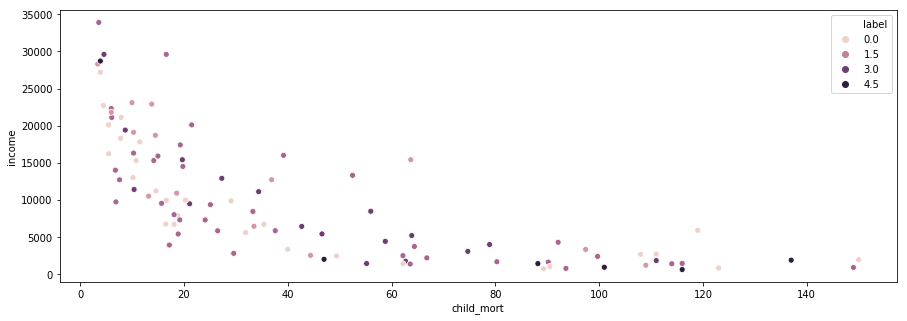

In [425]:
# Scatterplot of income and child_mort
plt.figure(figsize = (15,5))
sns.scatterplot(out_df['child_mort'], out_df['income'], hue = out_df['label'])

# From the above clusters we can clearly see that the label 4 is assigned to the countries which have ***very low income***, ***very low per capita GDP*** and ***high child deaths***.

In [427]:
list(out_df[out_df['label']==4]['country'])

['Comoros', 'Congo, Dem. Rep.', 'Greece', 'Mali', 'Mozambique', 'Nepal']

In [428]:
out_df[out_df['label']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,4.0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,4.0
60,Greece,3.9,22.10,10.30,30.7,28700,0.673,80.4,1.48,26900,4.0
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708,4.0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,4.0
109,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592,4.0


- Greece is an outlier here so we will not consider that country.

# So our NGO should invest in these 5 countries with only 4 clusters as it is not changing the solution
'Comoros', 'Congo, Dem. Rep.', 'Mali', 'Mozambique', 'Nepal'